<a href="https://www.kaggle.com/code/mananmalik19/time-series-analysis-project?scriptVersionId=236796163" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
data=pd.read_csv("/kaggle/input/currency-exchange-rates/exchange_rates.csv")
data

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,17/12/2021
1,1,Great Britain Pound,GBP,0.851619,17/12/2021
2,2,Euro,EUR,1.000000,17/12/2021
3,3,Japan Yen,JPY,128.301759,17/12/2021
4,4,Switzerland Franc,CHF,1.041015,17/12/2021
...,...,...,...,...,...
183769,183769,United Arab Emirates Dirham,AED,4.190153,29/04/2025
183770,183770,Vanuatu Vatu,VUV,137.556204,29/04/2025
183771,183771,Vietnam Dong,VND,29659.950634,29/04/2025
183772,183772,Yemen Rial,YER,279.607304,29/04/2025


In [3]:
# data.to_csv('dataset.csv', index=False)

In [4]:
data

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,17/12/2021
1,1,Great Britain Pound,GBP,0.851619,17/12/2021
2,2,Euro,EUR,1.000000,17/12/2021
3,3,Japan Yen,JPY,128.301759,17/12/2021
4,4,Switzerland Franc,CHF,1.041015,17/12/2021
...,...,...,...,...,...
183769,183769,United Arab Emirates Dirham,AED,4.190153,29/04/2025
183770,183770,Vanuatu Vatu,VUV,137.556204,29/04/2025
183771,183771,Vietnam Dong,VND,29659.950634,29/04/2025
183772,183772,Yemen Rial,YER,279.607304,29/04/2025


In [5]:
data.describe()

,Unnamed: 0,value
count,183774.000000,183774.000000
mean,91886.500000,1971.374077
std,53051.128522,7309.952816
min,0.000000,0.130975
25%,45943.250000,3.999498
50%,91886.500000,37.038125
75%,137829.750000,411.196434
max,183773.000000,103215.180201


**Preprocessing and EDA on currency data**

In [6]:
#check null
data.isnull().sum()

Unnamed: 0          0
Country/Currency    0
currency            0
value               0
date                0
dtype: int64

In [7]:
## Types of Currencies
data['currency'].unique()

array(['AUD', 'GBP', 'EUR', 'JPY', 'CHF', 'USD', 'AFN', 'ALL', 'DZD',
       'AOA', 'ARS', 'AMD', 'AWG', 'AZN', 'BSD', 'BHD', 'BDT', 'BBD',
       'BYR', 'BZD', 'BMD', 'BTN', 'BOB', 'BAM', 'BWP', 'BRL', 'BND',
       'BGN', 'BIF', 'XOF', 'XAF', 'XPF', 'KHR', 'CAD', 'CVE', 'KYD',
       'CLP', 'CNY', 'COP', 'KMF', 'CDF', 'CRC', 'HRK', 'CUC', 'CUP',
       'CZK', 'DKK', 'DJF', 'DOP', 'XCD', 'EGP', 'SVC', 'ETB', 'FKP',
       'FJD', 'GMD', 'GEL', 'GHS', 'GIP', 'GTQ', 'GNF', 'GYD', 'HTG',
       'HNL', 'HKD', 'HUF', 'ISK', 'INR', 'IDR', 'IRR', 'IQD', 'ILS',
       'JMD', 'JOD', 'KZT', 'KES', 'KWD', 'KGS', 'LAK', 'LBP', 'LSL',
       'LRD', 'LYD', 'MOP', 'MKD', 'MGA', 'MWK', 'MYR', 'MVR', 'MRO',
       'MUR', 'MXN', 'MDL', 'MNT', 'MAD', 'MZN', 'MMK', 'ANG', 'NAD',
       'NPR', 'NZD', 'NIO', 'NGN', 'KPW', 'NOK', 'OMR', 'PKR', 'PAB',
       'PGK', 'PYG', 'PEN', 'PHP', 'PLN', 'QAR', 'RON', 'RUB', 'RWF',
       'WST', 'STD', 'SAR', 'RSD', 'SCR', 'SLL', 'SGD', 'SBD', 'SOS',
       'ZAR', 'KRW',

In [8]:
## Types of Currencies
number_of_currencies = data['currency'].nunique()
print("No. of different currencies for each date in the dataset are",number_of_currencies)

No. of different currencies for each date in the dataset are 150


In [9]:
#currency names
data['Country/Currency'].unique()

array(['Australia Dollar', 'Great Britain Pound', 'Euro', 'Japan Yen',
       'Switzerland Franc', 'USA Dollar', 'Afghanistan Afghani',
       'Albania Lek', 'Algeria Dinar', 'Angola Kwanza', 'Argentina Peso',
       'Armenia Dram', 'Aruba Florin', 'Azerbaijan New Manat',
       'Bahamas Dollar', 'Bahrain Dinar', 'Bangladesh Taka',
       'Barbados Dollar', 'Belarus Ruble', 'Belize Dollar',
       'Bermuda Dollar', 'Bhutan Ngultrum', 'Bolivia Boliviano',
       'Bosnia Mark', 'Botswana Pula', 'Brazil Real', 'Brunei Dollar',
       'Bulgaria Lev', 'Burundi Franc', 'CFA Franc BCEAO',
       'CFA Franc BEAC', 'CFP Franc', 'Cambodia Riel', 'Canada Dollar',
       'Cape Verde Escudo', 'Cayman Islands Dollar', 'Chili Peso',
       'China Yuan/Renminbi', 'Colombia Peso', 'Comoros Franc',
       'Congo Franc', 'Costa Rica Colon', 'Croatia Kuna',
       'Cuba Convertible Peso', 'Cuba Peso', 'Czech Koruna',
       'Denmark Krone', 'Djibouti Franc', 'Dominican Republich Peso',
       'East Caribb

In [10]:
unique_country = list(data['Country/Currency'].unique())
unique_currency = list(data['currency'].unique())
for x in range(len(unique_country)):
    print('{0} -> {1}'.format(unique_country[x], unique_currency[x]))

Australia Dollar -> AUD
Great Britain Pound -> GBP
Euro -> EUR
Japan Yen -> JPY
Switzerland Franc -> CHF
USA Dollar -> USD
Afghanistan Afghani -> AFN
Albania Lek -> ALL
Algeria Dinar -> DZD
Angola Kwanza -> AOA
Argentina Peso -> ARS
Armenia Dram -> AMD
Aruba Florin -> AWG
Azerbaijan New Manat -> AZN
Bahamas Dollar -> BSD
Bahrain Dinar -> BHD
Bangladesh Taka -> BDT
Barbados Dollar -> BBD
Belarus Ruble -> BYR
Belize Dollar -> BZD
Bermuda Dollar -> BMD
Bhutan Ngultrum -> BTN
Bolivia Boliviano -> BOB
Bosnia Mark -> BAM
Botswana Pula -> BWP
Brazil Real -> BRL
Brunei Dollar -> BND
Bulgaria Lev -> BGN
Burundi Franc -> BIF
CFA Franc BCEAO -> XOF
CFA Franc BEAC -> XAF
CFP Franc -> XPF
Cambodia Riel -> KHR
Canada Dollar -> CAD
Cape Verde Escudo -> CVE
Cayman Islands Dollar -> KYD
Chili Peso -> CLP
China Yuan/Renminbi -> CNY
Colombia Peso -> COP
Comoros Franc -> KMF
Congo Franc -> CDF
Costa Rica Colon -> CRC
Croatia Kuna -> HRK
Cuba Convertible Peso -> CUC
Cuba Peso -> CUP
Czech Koruna -> CZK
Den

In [11]:
#Latest data
data.tail(150)

,Unnamed: 0,Country/Currency,currency,value,date
183624,183624,Zambia Kwacha,ZMK,10216.206405,28/04/2025
183625,183625,Australia Dollar,AUD,1.774961,29/04/2025
183626,183626,Great Britain Pound,GBP,0.849216,29/04/2025
183627,183627,Euro,EUR,1.000000,29/04/2025
183628,183628,Japan Yen,JPY,162.302693,29/04/2025
...,...,...,...,...,...
183769,183769,United Arab Emirates Dirham,AED,4.190153,29/04/2025
183770,183770,Vanuatu Vatu,VUV,137.556204,29/04/2025
183771,183771,Vietnam Dong,VND,29659.950634,29/04/2025
183772,183772,Yemen Rial,YER,279.607304,29/04/2025


In [12]:
# The value is relative to each euro

In [13]:
import pandas as pd

# Load data
data = pd.read_csv("/kaggle/input/currency-exchange-rates/exchange_rates.csv")

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Filter data where date is greater than October 2022
data = data[data['date'] > '2022-10-01']

# Print first few rows to verify
print(data.head())

# If the data follows a pattern or trend after filtering, we update the original dataset
original_data = data.copy()  # Keep a copy of filtered data

# Print confirmation
print("Original dataset updated with filtered data.")


       Unnamed: 0     Country/Currency currency       value       date
43484       43484     Australia Dollar      AUD    1.531041 2022-10-02
43485       43485  Great Britain Pound      GBP    0.879353 2022-10-02
43486       43486                 Euro      EUR    1.000000 2022-10-02
43487       43487            Japan Yen      JPY  141.913483 2022-10-02
43488       43488    Switzerland Franc      CHF    0.969398 2022-10-02
Original dataset updated with filtered data.


<ipython-input-13-e71db9e8baa1>:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


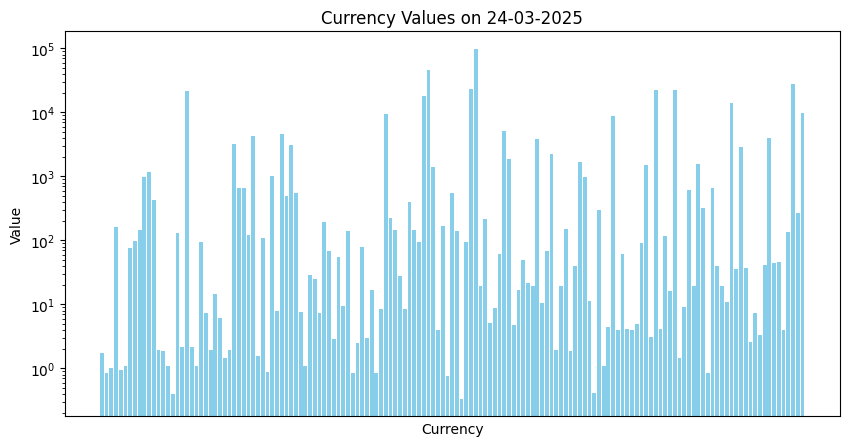

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for the specific date
data_filtered = data[data['date'] == '2025-03-24']

# Plot the values of each currency
plt.figure(figsize=(10, 5))
plt.bar(data_filtered['currency'], data_filtered['value'], color='skyblue')

# Formatting
plt.xlabel("Currency")
plt.ylabel("Value")
plt.title("Currency Values on 24-03-2025")
# plt.xticks(rotation=45)  # Rotate labels for readability
plt.xticks([])  # Remove x-axis labels
plt.yscale("log")  # Apply log scale for better visibility

plt.show()


In [15]:
#show variablity in currency data

In [16]:
#Analysing one currency(E.g. INR)
data_inr = data.loc[data.currency == 'INR']
data_inr.head()

,Unnamed: 0,Country/Currency,currency,value,date
43551,43551,India Rupee,INR,80.044681,2022-10-02
43701,43701,India Rupee,INR,79.828781,2022-10-03
43851,43851,India Rupee,INR,80.141953,2022-10-04
44001,44001,India Rupee,INR,81.317346,2022-10-05
44151,44151,India Rupee,INR,80.817740,2022-10-06


In [17]:
# !pip install plotly


In [18]:
# Plotting INR data
import plotly.express as px

fig = px.line(data_inr, x='date', y='value', title='INR Currency Analysis')

# Show the figure
fig.show()

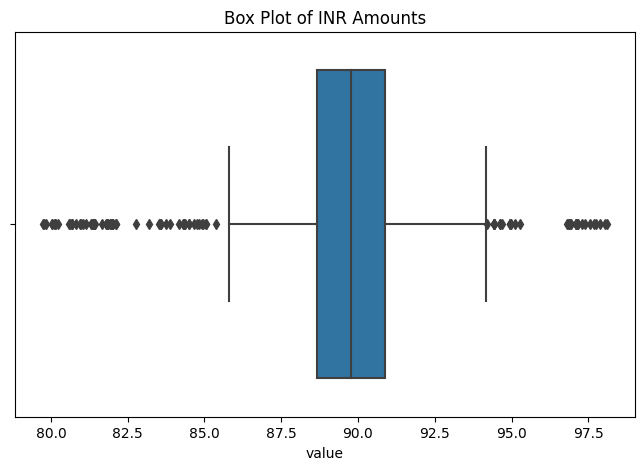

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'amount' is the column of interest
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_inr['value'])
plt.title("Box Plot of INR Amounts")
plt.show()


In [20]:
data_usd = data.loc[data.currency == 'USD']
data_usd.tail()

,Unnamed: 0,Country/Currency,currency,value,date
183034,183034,USA Dollar,USD,1.137223,2025-04-25
183183,183183,USA Dollar,USD,1.140506,2025-04-26
183332,183332,USA Dollar,USD,1.139336,2025-04-27
183481,183481,USA Dollar,USD,1.134983,2025-04-28
183630,183630,USA Dollar,USD,1.140767,2025-04-29


In [21]:
import plotly.express as px

fig = px.line(data_usd, x='date', y='value', title='USD Currency Analysis')

# Show the figure
fig.show()


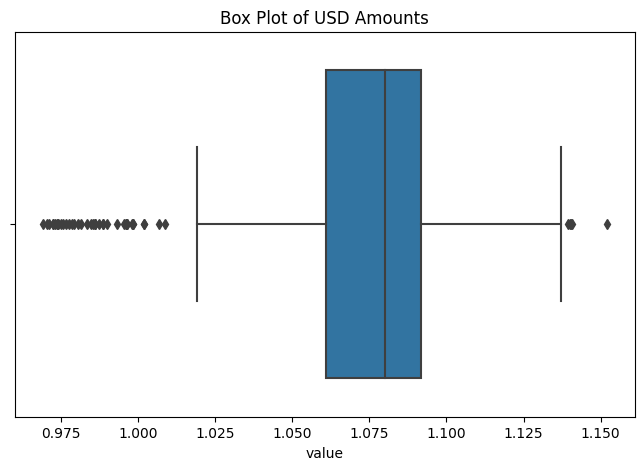

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'amount' is the column of interest
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_usd['value'])
plt.title("Box Plot of USD Amounts")
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply Standard Scaling per currency and flatten the result
data['value_standardized'] = data.groupby('currency')['value'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten())


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply MinMax scaling per currency
data['value_scaled'] = data.groupby('currency')['value'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten())


In [25]:
print(data[['currency', 'value', 'value_standardized','value_scaled']].head(10))


      currency       value  value_standardized  value_scaled
43484      AUD    1.531041           -2.061067      0.398341
43485      GBP    0.879353            1.326798      0.743897
43486      EUR    1.000000            0.000000      0.000000
43487      JPY  141.913483           -1.754993      0.100197
43488      CHF    0.969398            0.343357      0.547741
43489      USD    0.980478           -3.254439      0.061500
43490      AFN   86.776240            0.474480      0.570832
43491      ALL  116.628286            1.759045      0.954199
43492      DZD  138.074911           -2.521145      0.126278
43493      AOA  424.944678           -2.183501      0.000852


In [26]:
print(data[['currency', 'value', 'value_standardized']].groupby('currency').agg(['mean', 'std']))


                value             value_standardized          
                 mean         std               mean       std
currency                                                      
AED          3.947981    0.106559       2.663118e-15  1.000532
AFN         82.843950    8.291997      -1.998106e-16  1.000532
ALL        105.131486    6.539300       6.495986e-16  1.000532
AMD        422.692923   11.258971       6.413073e-15  1.000532
ANG          1.936210    0.052186      -8.125888e-17  1.000532
...               ...         ...                ...       ...
XOF        655.580370   10.943407      -3.655926e-15  1.000532
XPF        133.004856  413.756485       8.385727e-18  1.000532
YER        268.551776    8.304004       1.950922e-15  1.000532
ZAR         19.716253    0.847260      -1.663209e-15  1.000532
ZMK       9675.427870  261.305396       7.283063e-15  1.000532

[150 rows x 4 columns]


In [27]:
# Group by currency and compute mean & std for 'value_standardized'
grouped_stats = data.groupby('currency')['value_standardized'].agg(['mean', 'std'])

# Display results for USD and INR
print(grouped_stats.loc[['USD', 'INR']])

                  mean       std
currency                        
USD       2.860596e-15  1.000532
INR       1.585965e-15  1.000532


In [28]:
#The mean is close to 0 and std_deviation is close to 1

In [29]:
data_inr = data.loc[data.currency == 'INR']
print(data_inr[['currency', 'value', 'value_standardized','value_scaled']].head(10))

      currency      value  value_standardized  value_scaled
43551      INR  80.044681           -3.484013      0.016408
43701      INR  79.828781           -3.562102      0.004646
43851      INR  80.141953           -3.448831      0.021707
44001      INR  81.317346           -3.023704      0.085741
44151      INR  80.817740           -3.204406      0.058523
44301      INR  80.607715           -3.280370      0.047081
44451      INR  80.672235           -3.257034      0.050596
44601      INR  80.679930           -3.254251      0.051015
44751      INR  80.605030           -3.281341      0.046935
44901      INR  80.043843           -3.484316      0.016363


In [30]:
data_usd = data.loc[data.currency == 'USD']
print(data_usd[['currency', 'value', 'value_standardized','value_scaled']])

       currency     value  value_standardized  value_scaled
43489       USD  0.980478           -3.254439      0.061500
43639       USD  0.979235           -3.297279      0.054698
43789       USD  0.983395           -3.153903      0.077465
43939       USD  0.998178           -2.644400      0.158373
44089       USD  0.989820           -2.932462      0.112630
...         ...       ...                 ...           ...
183034      USD  1.137223            2.147851      0.919371
183183      USD  1.140506            2.261001      0.937339
183332      USD  1.139336            2.220676      0.930936
183481      USD  1.134983            2.070648      0.907112
183630      USD  1.140767            2.269996      0.938768

[940 rows x 4 columns]


**Label encoding**

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode 'currency' column
data['currency_encoded'] = le.fit_transform(data['currency'])

print(data[['currency','currency_encoded']].head(152))  # Check encoding


      currency  currency_encoded
43484      AUD                 7
43485      GBP                45
43486      EUR                42
43487      JPY                66
43488      CHF                27
...        ...               ...
43631      VND               140
43632      YER               147
43633      ZMK               149
43634      AUD                 7
43635      GBP                45

[152 rows x 2 columns]


In [32]:
# Extract the encoded value for INR and USD
inr_encoded = data.loc[data['currency'] == 'INR', 'currency_encoded'].iloc[0]
usd_encoded = data.loc[data['currency'] == 'USD', 'currency_encoded'].iloc[0]

print(f"INR encoded as: {inr_encoded}")
print(f"USD encoded as: {usd_encoded}")


INR encoded as: 60
USD encoded as: 138


In [33]:
# !pip install statsmodels

INR


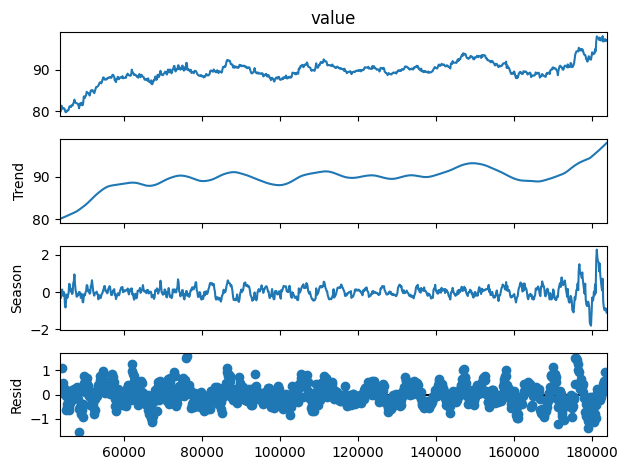

In [34]:
print("INR")
import matplotlib.pyplot as plt
#lets check seasonality
from statsmodels.tsa.seasonal import STL
stl = STL(data_inr['value'], period=30)
result = stl.fit()

result.plot()
plt.show()

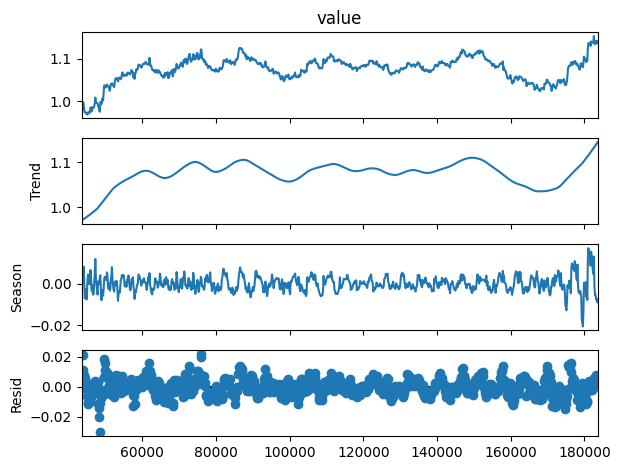

In [35]:
import matplotlib.pyplot as plt
#lets check seasonality
from statsmodels.tsa.seasonal import STL
stl = STL(data_usd['value'], period=30)
result = stl.fit()

result.plot()
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller, kpss
#Augmented Dickey-Fuller Test
adf_test = adfuller(data_inr['value'])
print("ADF Test Results:")
print(f"Test Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] < 0.05:
    print("The time series is stationary based on the ADF test.")
else:
    print("The time series is non-stationary based on the ADF test.")

ADF Test Results:
Test Statistic: -2.4672963149004628
p-value: 0.12363557636858363
The time series is non-stationary based on the ADF test.


In [37]:
kpss_test = kpss(data_inr['value'], regression='c', nlags='auto')
print("\nKPSS Test Results:")
# print(f"Test Statistic: {kpss_test[0]}")
print(f"p-value: {kpss_test[1]}")
print(f"Critical Values: {kpss_test[3]}")
if kpss_test[1] < 0.05:
    print("The time series is non-stationary based on the KPSS test.")
else:
    print("The time series is stationary based on the KPSS test.") 


KPSS Test Results:
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The time series is non-stationary based on the KPSS test.


<ipython-input-37-1cb9fb4fb176>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [38]:
#this means our data is trend stationary
data_inr['value_diff'] = data_inr['value'].diff()
data_inr = data_inr.dropna()
data_inr

<ipython-input-38-a73f1bc0527b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Country/Currency,currency,value,date,value_standardized,value_scaled,value_diff
43701,43701,India Rupee,INR,79.828781,2022-10-03,-3.562102,0.004646,-0.215900
43851,43851,India Rupee,INR,80.141953,2022-10-04,-3.448831,0.021707,0.313172
44001,44001,India Rupee,INR,81.317346,2022-10-05,-3.023704,0.085741,1.175393
44151,44151,India Rupee,INR,80.817740,2022-10-06,-3.204406,0.058523,-0.499606
44301,44301,India Rupee,INR,80.607715,2022-10-07,-3.280370,0.047081,-0.210025
...,...,...,...,...,...,...,...,...
183096,183096,India Rupee,INR,96.926825,2025-04-25,2.622070,0.936114,0.044675
183245,183245,India Rupee,INR,97.381787,2025-04-26,2.786625,0.960899,0.454962
183394,183394,India Rupee,INR,97.282045,2025-04-27,2.750549,0.955466,-0.099742
183543,183543,India Rupee,INR,96.910715,2025-04-28,2.616243,0.935236,-0.371330


In [39]:
data_inr['ema_7'] = data_inr['value_diff'].ewm(span=7, adjust=False).mean()

In [40]:
from statsmodels.tsa.stattools import adfuller, kpss
#Augmented Dickey-Fuller Test
adf_test = adfuller(data_inr['ema_7'])
print("ADF Test Results:")
print(f"Test Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] < 0.05:
    print("The time series is stationary based on the ADF test.")
else:
    print("The time series is non-stationary based on the ADF test.")

ADF Test Results:
Test Statistic: -7.770786359289917
p-value: 8.932917376084949e-12
The time series is stationary based on the ADF test.


In [41]:
kpss_test = kpss(data_inr['ema_7'], regression='c', nlags='auto')
print("\nKPSS Test Results:")
# print(f"Test Statistic: {kpss_test[0]}")
print(f"p-value: {kpss_test[1]}")
print(f"Critical Values: {kpss_test[3]}")
if kpss_test[1] < 0.05:
    print("The time series is non-stationary based on the KPSS test.")
else:
    print("The time series is stationary based on the KPSS test.") 


KPSS Test Results:
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The time series is stationary based on the KPSS test.


<ipython-input-41-afb64b8e6522>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [42]:
#now the data is pure stationary

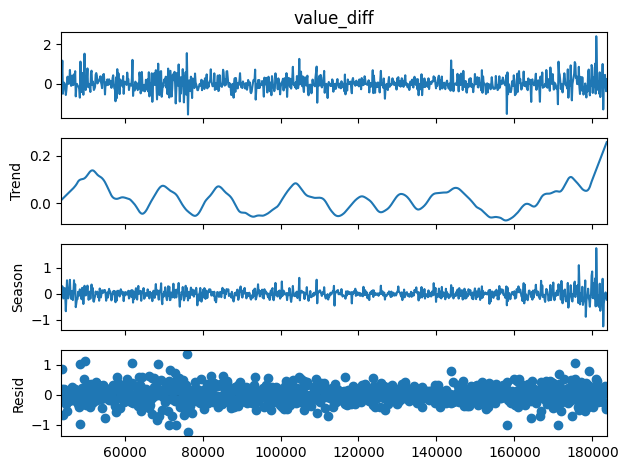

In [43]:
import matplotlib.pyplot as plt
#lets check seasonality
from statsmodels.tsa.seasonal import STL
stl = STL(data_inr['value_diff'], period=30)
result = stl.fit()

result.plot()
plt.show()

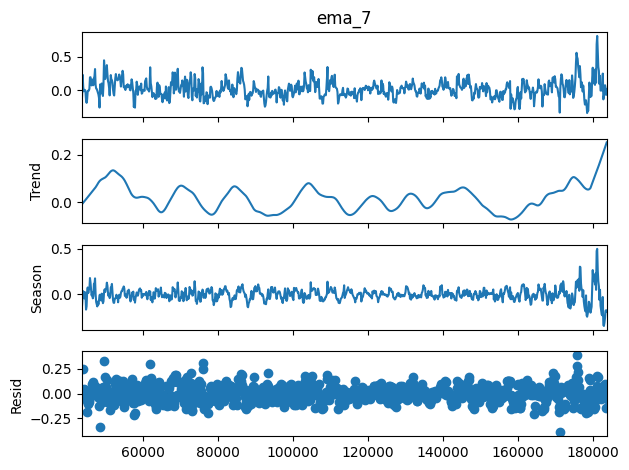

In [44]:
import matplotlib.pyplot as plt
#lets check seasonality
from statsmodels.tsa.seasonal import STL
stl = STL(data_inr['ema_7'], period=30)
result = stl.fit()

result.plot()
plt.show()

In [45]:
# we can clearly notice that our data is much smoother with em_7 (exponential smoothing)

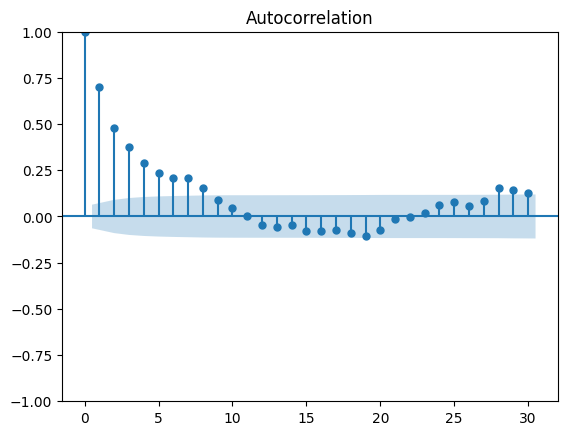

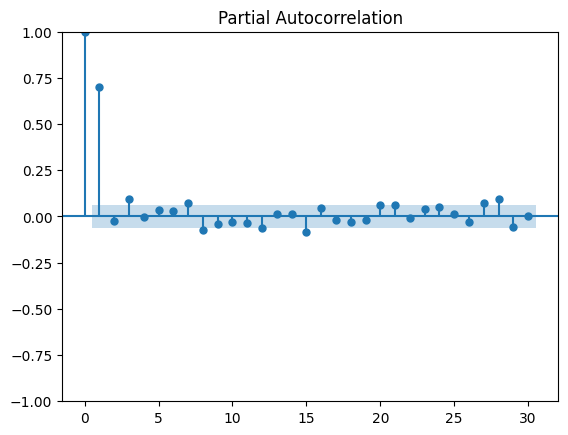

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(data_inr['ema_7'], lags=30)
plot_pacf(data_inr['ema_7'], lags=30)
plt.show()

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets (80% train, 20% test)
train_size = int(len(data_inr) * 0.8)
train, test = data_inr.iloc[:train_size], data_inr.iloc[train_size:]
# Assuming your datetime column is named 'date'
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# ARIMA with revised order
arima_model = sm.tsa.ARIMA(train['ema_7'], order=(1,1,8))
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=len(test))

# SARIMA with seasonal adjustments
seasonal_order = (1, 1, 1, 30)
sarima_model = sm.tsa.SARIMAX(train['ema_7'], order=(1,1,8), seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()
sarima_forecast = sarima_results.forecast(steps=len(test))

# Compare Actual vs Forecast
comparison_df = pd.DataFrame({
    'Actual': test['ema_7'].values,
    'ARIMA_Predicted': arima_forecast.values,
    'SARIMA_Predicted': sarima_forecast.values
}, index=test.index)

print(comparison_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer i

                                 Actual  ARIMA_Predicted  SARIMA_Predicted
1970-01-01 00:00:00.000155839 -0.145230        -0.078723         -0.054870
1970-01-01 00:00:00.000155988 -0.143660        -0.065312         -0.029175
1970-01-01 00:00:00.000156137 -0.011699        -0.068667         -0.045494
1970-01-01 00:00:00.000156286 -0.056422        -0.044685         -0.049195
1970-01-01 00:00:00.000156435 -0.042317        -0.040953         -0.058057
...                                 ...              ...               ...
1970-01-01 00:00:00.000183096 -0.051055        -0.040304         -0.062348
1970-01-01 00:00:00.000183245  0.075449        -0.040304         -0.064753
1970-01-01 00:00:00.000183394  0.031651        -0.040304         -0.060938
1970-01-01 00:00:00.000183543 -0.069094        -0.040304         -0.046640
1970-01-01 00:00:00.000183692  0.007566        -0.040304         -0.050620

[188 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



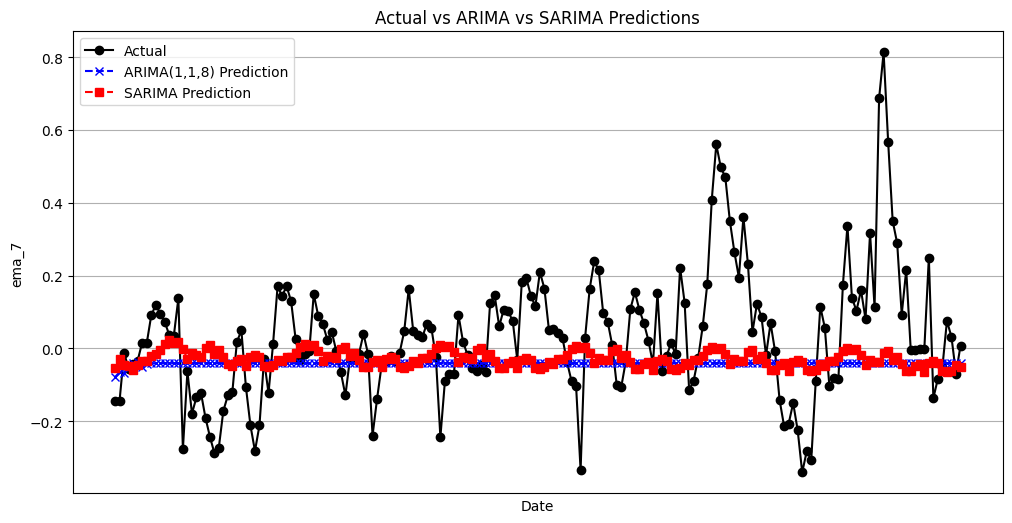

In [48]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Actual values
plt.plot(comparison_df.index, comparison_df['Actual'], label="Actual", color='black', marker='o')

# ARIMA predictions
plt.plot(comparison_df.index, comparison_df['ARIMA_Predicted'], label="ARIMA(1,1,8) Prediction", color='blue', linestyle='dashed', marker='x')

# SARIMA predictions
plt.plot(comparison_df.index, comparison_df['SARIMA_Predicted'], label="SARIMA Prediction", color='red', linestyle='dashed', marker='s')

# Formatting
plt.xlabel("Date")
plt.ylabel("ema_7")
plt.title("Actual vs ARIMA vs SARIMA Predictions")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [49]:
data = pd.DataFrame(data_inr['ema_7'])  # replace 'ema_7' with the desired column name
data.columns = ['Value']


In [50]:
# Scale the values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
sequence_length = 10
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)


In [51]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0451 - val_loss: 0.0063
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0107 - val_loss: 0.0065
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0085 - val_loss: 0.0064
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0080 - val_loss: 0.0061
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - val_loss: 0.0060
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - val_loss: 0.0061
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0081 - val_loss: 0.0060
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0081 - val_loss: 0.0063
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0082 - val_loss: 0.0061
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0080 - val_loss: 0.0061
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

In [53]:
# Predict and inverse transform
predicted_scaled = lstm_model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [54]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual values
fig.add_trace(go.Scatter(
    y=actual.flatten(),
    mode='lines+markers',
    name='Actual',
    line=dict(color='black')
))

# LSTM predictions
fig.add_trace(go.Scatter(
    y=predicted.flatten(),
    mode='lines+markers',
    name='LSTM Prediction',
    line=dict(color='green', dash='dash')
))

fig.update_layout(
    title='Actual vs LSTM Predictions on data_inr',
    xaxis_title='Time Step',
    yaxis_title='Value',
    template='plotly_white'
)

fig.show()


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X.shape[1], 1)))
bi_lstm_model.add(Bidirectional(LSTM(50)))
bi_lstm_model.add(Dense(1))

bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
bi_lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0418 - val_loss: 0.0085
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0100 - val_loss: 0.0063
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - val_loss: 0.0060
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0089 - val_loss: 0.0058
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0071 - val_loss: 0.0056
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080 - val_loss: 0.0054
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - val_loss: 0.0054
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0072 - val_loss: 0.0049
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - val_l

In [56]:
# Predict and inverse transform
predicted_scaled = bi_lstm_model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [57]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual
fig.add_trace(go.Scatter(
    y=actual.flatten(),
    mode='lines+markers',
    name='Actual',
    line=dict(color='black')
))

# Prediction
fig.add_trace(go.Scatter(
    y=predicted.flatten(),
    mode='lines+markers',
    name='Bidirectional LSTM Prediction',
    line=dict(color='purple', dash='dash')
))

fig.update_layout(
    title='Actual vs Bidirectional LSTM Predictions on data_inr',
    xaxis_title='Time Step',
    yaxis_title='Value',
    template='plotly_white'
)

fig.show()


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. ARIMA metrics ---
mae_arima = mean_absolute_error(comparison_df['Actual'], comparison_df['ARIMA_Predicted'])
mse_arima = mean_squared_error(comparison_df['Actual'], comparison_df['ARIMA_Predicted'])
rmse_arima = np.sqrt(mse_arima)

print(f"ARIMA Model - MAE: {mae_arima:.4f}, MSE: {mse_arima:.4f}, RMSE: {rmse_arima:.4f}")

# --- 2. SARIMA metrics ---
mae_sarima = mean_absolute_error(comparison_df['Actual'], comparison_df['SARIMA_Predicted'])
mse_sarima = mean_squared_error(comparison_df['Actual'], comparison_df['SARIMA_Predicted'])
rmse_sarima = np.sqrt(mse_sarima)

print(f"SARIMA Model - MAE: {mae_sarima:.4f}, MSE: {mse_sarima:.4f}, RMSE: {rmse_sarima:.4f}")

# --- 3. Predict on LSTM model
predicted_scaled = lstm_model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)  # inverse scaling

# Get the actual values
actual = scaler.inverse_transform(y_test)

# Now calculate metrics
mae_lstm = mean_absolute_error(actual.flatten(), predicted.flatten())
mse_lstm = mean_squared_error(actual.flatten(), predicted.flatten())
rmse_lstm = np.sqrt(mse_lstm)

print(f"LSTM Model - MAE: {mae_lstm:.4f}, MSE: {mse_lstm:.4f}, RMSE: {rmse_lstm:.4f}")


# --- 4. Bi-LSTM metrics (if you want) ---
# Predict on BiLSTM
predicted_bilstm_scaled = bi_lstm_model.predict(X_test)
predicted_bilstm = scaler.inverse_transform(predicted_bilstm_scaled)

mae_bilstm = mean_absolute_error(actual.flatten(), predicted_bilstm.flatten())
mse_bilstm = mean_squared_error(actual.flatten(), predicted_bilstm.flatten())
rmse_bilstm = np.sqrt(mse_bilstm)

print(f"BiLSTM Model - MAE: {mae_bilstm:.4f}, MSE: {mse_bilstm:.4f}, RMSE: {rmse_bilstm:.4f}")


ARIMA Model - MAE: 0.1353, MSE: 0.0357, RMSE: 0.1891
SARIMA Model - MAE: 0.1346, MSE: 0.0344, RMSE: 0.1855
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
LSTM Model - MAE: 0.1009, MSE: 0.0202, RMSE: 0.1422
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
BiLSTM Model - MAE: 0.0926, MSE: 0.0167, RMSE: 0.1291
